In [1]:
import pandas as pd

df=pd.read_csv("D:/PDA/Machine Learning/Importants/Projects/retail_sales_50k.csv")

In [2]:
df.head()

,Order_ID,Customer_ID,Gender,Age,Country,Product_Category,Quantity,Unit_Price,Discount,Order_Date,Payment_Method,Ad_Campaign,Returned,Total_Sales
0,10001,C00861,Male,40,Germany,Fashion,7,5232,0.00,2023-01-01 00:00:00.000000000,Credit Card,B,No,36624.00
1,10002,C03773,Female,32,India,Home,7,8563,0.00,2023-01-01 00:21:01.465229304,Debit Card,A,No,59941.00
2,10003,C03093,Male,28,India,Home,4,3369,0.10,2023-01-01 00:42:02.930458609,Debit Card,A,No,12128.40
3,10004,C00467,Female,38,UAE,Home,4,6796,0.10,2023-01-01 01:03:04.395687913,Debit Card,A,No,24465.60
4,10005,C04427,Male,56,UK,Groceries,7,2949,0.15,2023-01-01 01:24:05.860917218,COD,A,No,17546.55


In [3]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          50000 non-null  int64  
 1   Customer_ID       50000 non-null  object 
 2   Gender            50000 non-null  object 
 3   Age               50000 non-null  int64  
 4   Country           50000 non-null  object 
 5   Product_Category  50000 non-null  object 
 6   Quantity          50000 non-null  int64  
 7   Unit_Price        50000 non-null  int64  
 8   Discount          50000 non-null  float64
 9   Order_Date        50000 non-null  object 
 10  Payment_Method    50000 non-null  object 
 11  Ad_Campaign       50000 non-null  object 
 12  Returned          50000 non-null  object 
 13  Total_Sales       50000 non-null  float64
dtypes: float64(2), int64(4), object(8)
memory usage: 5.3+ MB


(None,
            Order_ID          Age      Quantity    Unit_Price      Discount  \
 count  50000.000000  50000.00000  50000.000000  50000.000000  50000.000000   
 mean   35000.500000     38.50342      5.000940   5058.984660      0.064529   
 std    14433.901067     12.12167      2.585783   2857.424908      0.066968   
 min    10001.000000     18.00000      1.000000    100.000000      0.000000   
 25%    22500.750000     28.00000      3.000000   2580.000000      0.000000   
 50%    35000.500000     39.00000      5.000000   5068.000000      0.050000   
 75%    47500.250000     49.00000      7.000000   7549.000000      0.100000   
 max    60000.000000     59.00000      9.000000   9999.000000      0.200000   
 
         Total_Sales  
 count  50000.000000  
 mean   23590.875883  
 std    19358.087182  
 min       89.600000  
 25%     7671.900000  
 50%    18160.100000  
 75%    35309.100000  
 max    89991.000000  )

In [8]:
#Total revenue
df['Total_Revenue']=df['Total_Sales'].sum()
df['Total_Revenue']

0        1.179544e+09
1        1.179544e+09
2        1.179544e+09
3        1.179544e+09
4        1.179544e+09
             ...     
49995    1.179544e+09
49996    1.179544e+09
49997    1.179544e+09
49998    1.179544e+09
49999    1.179544e+09
Name: Total_Revenue, Length: 50000, dtype: float64

In [14]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          50000 non-null  int64         
 1   Customer_ID       50000 non-null  object        
 2   Gender            50000 non-null  object        
 3   Age               50000 non-null  int64         
 4   Country           50000 non-null  object        
 5   Product_Category  50000 non-null  object        
 6   Quantity          50000 non-null  int64         
 7   Unit_Price        50000 non-null  int64         
 8   Discount          50000 non-null  float64       
 9   Order_Date        50000 non-null  datetime64[ns]
 10  Payment_Method    50000 non-null  object        
 11  Ad_Campaign       50000 non-null  object        
 12  Returned          50000 non-null  object        
 13  Total_Sales       50000 non-null  float64       
 14  Total_Revenue     5000

In [14]:
# 2. Average Order Value
import numpy as np
Avg_order_value=df['Total_Sales'].mean()
Avg_order_value

23590.875883

In [16]:
# 3. Total Quantity Sold
Total_Quantity=df['Quantity'].sum()
Total_Quantity


250047

In [20]:
# 4. Sales by Product Category
Total_sales_Category=df.groupby('Product_Category')['Total_Sales'].sum()
Total_sales_Category

Product_Category
Electronics    2.380019e+08
Fashion        2.354765e+08
Groceries      2.344555e+08
Home           2.340259e+08
Sports         2.375840e+08
Name: Total_Sales, dtype: float64

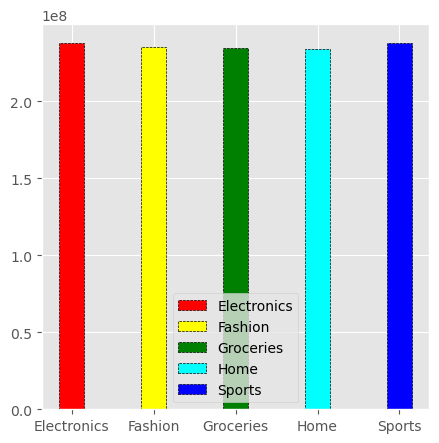

In [43]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(5,5))
plt.bar(Total_sales_Category.index,Total_sales_Category.values,color=['red','yellow','green','cyan','blue'],edgecolor='black',linestyle='dashed',
        label=Total_sales_Category.index,width=0.3)
plt.legend(loc='best')
plt.show()

In [21]:
# 5. Sales by Country
Total_sales_Country=df.groupby('Country')['Total_Sales'].sum()
Total_sales_Country

Country
Germany    1.190884e+08
India      4.699924e+08
UAE        2.359550e+08
UK         1.200845e+08
USA        2.344235e+08
Name: Total_Sales, dtype: float64

In [44]:
# 6. Payment Method Distribution
Payment_Distribution=df['Payment_Method'].value_counts()
Payment_Distribution


Payment_Method
UPI            12629
Debit Card     12469
COD            12469
Credit Card    12433
Name: count, dtype: int64

In [27]:
# 7. Revenue by Ad Campaign
Total_Ad_Campaign=df.groupby('Ad_Campaign')['Total_Sales'].sum()
Total_Ad_Campaign

Ad_Campaign
A    5.935498e+08
B    5.859940e+08
Name: Total_Sales, dtype: float64

In [30]:
# 8. Return Rate
Return_Rate=df['Returned'].value_counts(normalize=True)*100
Return_Rate

Returned
No     89.838
Yes    10.162
Name: proportion, dtype: float64

In [34]:
 # 9.Average Discount Given
# 10. Gender-based Sales
sales_Gender=df.groupby('Gender')['Total_Sales'].sum()
sales_Gender

Gender
Female    5.949133e+08
Male      5.846305e+08
Name: Total_Sales, dtype: float64

In [3]:
# 11. Age-wise Sales (Customer behaviour)
Age_Sales_cat=df.groupby('Age')['Total_Sales'].sum()
    

In [4]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])

In [5]:
# 12. Monthly Sales Trend (Time Series KPI)
Monthly_Sales=df.resample('d',on='Order_Date')['Total_Sales'].sum()

In [6]:
# 13. Top 10 Customers by Revenue
Top_10_Customers_by_Revenue=df.groupby('Customer_ID')['Total_Sales'].sum().nlargest(10)

In [53]:
# 14. Category-wise Quantity Sold
Country_wise_Quantity_Sold=df.groupby('Product_Category')['Quantity'].sum()
Country_wise_Quantity_Sold
# -----------------------

Product_Category
Electronics    50168
Fashion        49945
Groceries      49777
Home           49915
Sports         50242
Name: Quantity, dtype: int64

In [60]:
# 15. Highest Selling Day
Highest_Selling_Day=df.resample('d',on='Order_Date')['Total_Sales'].sum()
Highest_Selling_Day.max()

2102071.25

In [58]:
max_selling=Highest_Selling_Day.idxmax(), Highest_Selling_Day.max()
max_selling

(Timestamp('2023-05-17 00:00:00'), 2102071.25)